memanggil dataset


In [ ]:
! gdown --id 1sWNHcG-V9qKfXUMfYwFE5w84XuJkVP1y

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1sWNHcG-V9qKfXUMfYwFE5w84XuJkVP1y
From (redirected): https://drive.google.com/uc?id=1sWNHcG-V9qKfXUMfYwFE5w84XuJkVP1y&confirm=t&uuid=26392bc0-b4b3-4eab-9b0f-6b9fb6fbd83e
To: /content/animals.zip
100% 614M/614M [00:11<00:00, 55.4MB/s]


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
import zipfile

local_zip = '/content/animals.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
dataset_dir = '/content/animals'

classes = os.listdir(dataset_dir)
print(f"Total number of classes: {len(classes)}")


Total number of classes: 10


In [ ]:
# Count the number of images in each class
class_counts = {cls: len(os.listdir(os.path.join(dataset_dir, cls))) for cls in classes}
# Display the number of images per class
for cls, count in class_counts.items():
    print(f"Class {cls} has {count} images")

Class cane has 4863 images
Class mucca has 1866 images
Class gatto has 1668 images
Class scoiattolo has 1862 images
Class elefante has 1446 images
Class cavallo has 2623 images
Class ragno has 4821 images
Class gallina has 3098 images
Class pecora has 1820 images
Class farfalla has 2112 images


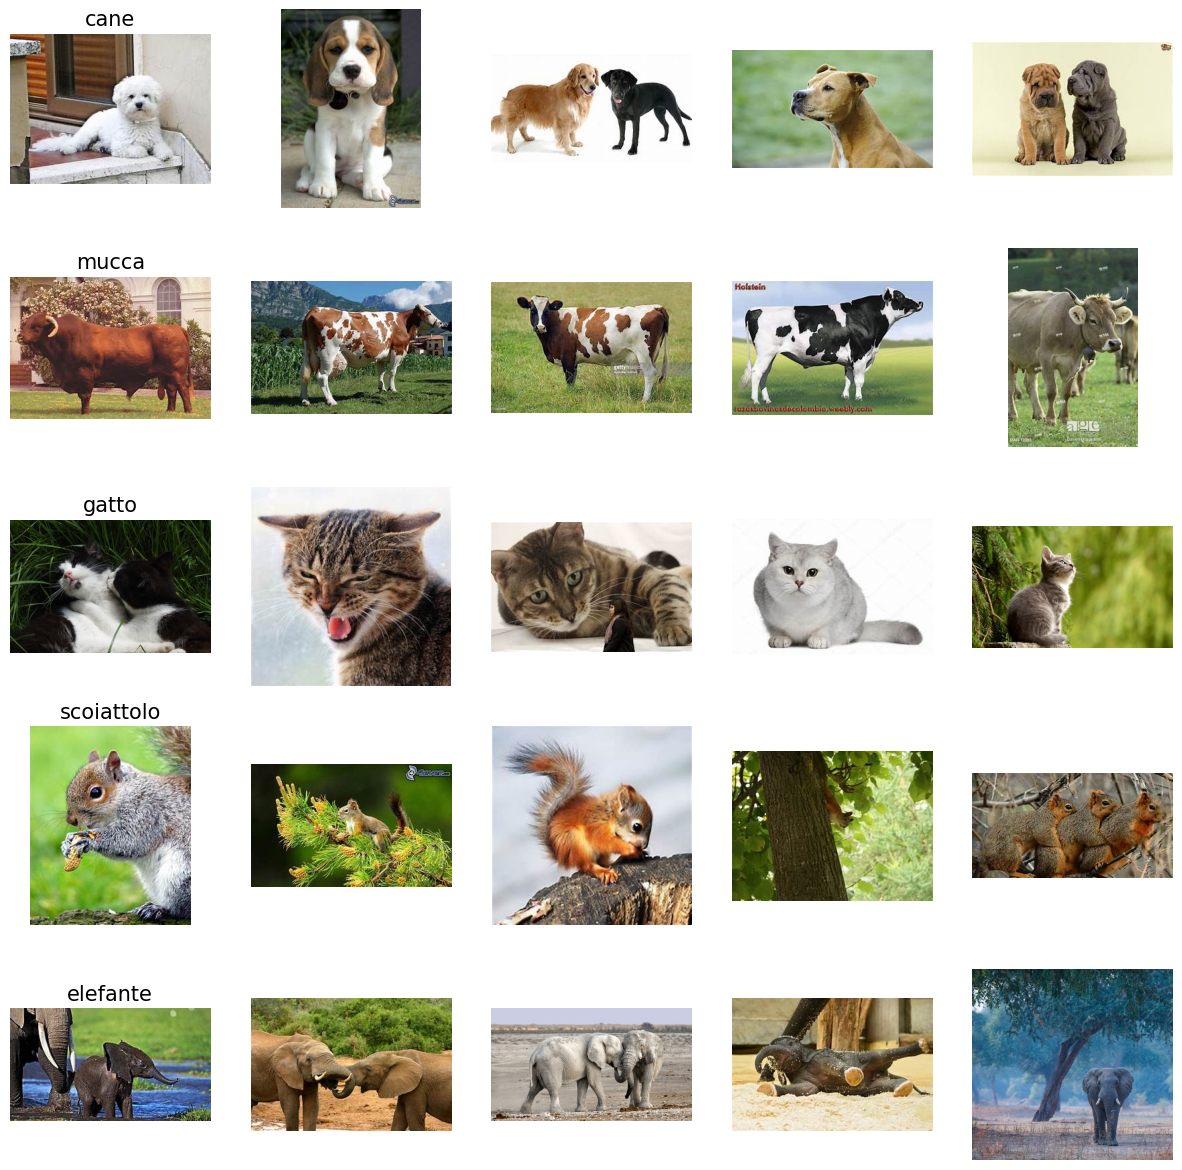

In [ ]:
def display_examples(dataset_dir, classes, num_examples=5):
    fig, axes = plt.subplots(len(classes), num_examples, figsize=(15, len(classes) * 3))
    for i, cls in enumerate(classes):
        image_dir = os.path.join(dataset_dir, cls)
        image_names = os.listdir(image_dir)[:num_examples]
        for j, image_name in enumerate(image_names):
            img_path = os.path.join(image_dir, image_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(cls, size=15)
    plt.show()

# Display example images from a few classes
display_examples(dataset_dir, classes[:5], num_examples=5)

Ngetest ya ges ya

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

#validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    #Dense(288, activation='relu'),
    Dense(512, activation='relu'),
    Dense(len(classes), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10)

Epoch 1/10
654/654 [==============================] - 278s 421ms/step - loss: 1.8205 - accuracy: 0.3784 - val_loss: 1.5285 - val_accuracy: 0.4680
Epoch 2/10
654/654 [==============================] - 274s 419ms/step - loss: 1.3371 - accuracy: 0.5476 - val_loss: 1.2745 - val_accuracy: 0.5531
Epoch 3/10
654/654 [==============================] - 274s 419ms/step - loss: 1.1118 - accuracy: 0.6200 - val_loss: 1.1206 - val_accuracy: 0.6229
Epoch 4/10
654/654 [==============================] - 272s 415ms/step - loss: 0.9742 - accuracy: 0.6676 - val_loss: 0.9821 - val_accuracy: 0.6775
Epoch 5/10
654/654 [==============================] - 271s 414ms/step - loss: 0.8644 - accuracy: 0.7097 - val_loss: 1.1487 - val_accuracy: 0.6168
Epoch 6/10
654/654 [==============================] - 268s 410ms/step - loss: 0.7802 - accuracy: 0.7373 - val_loss: 0.8939 - val_accuracy: 0.7049
Epoch 7/10
654/654 [==============================] - 268s 410ms/step - loss: 0.7014 - accuracy: 0.7645 - val_loss: 0.8993 -